# Выявление определяющих успешность игры закономерностей
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [ ]:
data = pd.read_csv('/datasets/games.csv')
pd.set_option('display.max_columns', None)
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


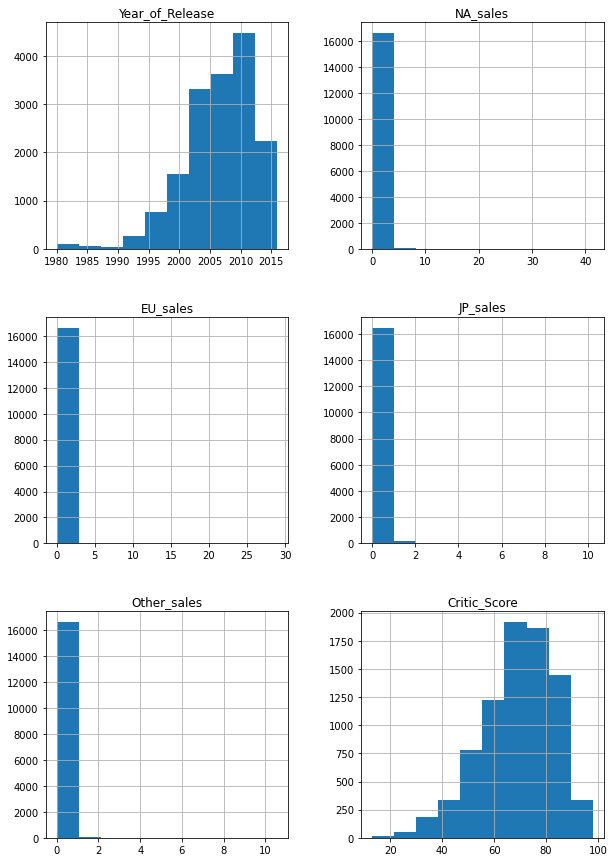

In [ ]:
data.hist(figsize=(10, 15));

**Вывод:** Файл содержит данные по 16715 продажам игр за разные годы, каждый из которых описывается 11 признаками (6 количественных и 5 категориальных). У некоторых признаков есть пропущенные значения, которые было необходимо обработать, а также решить, что делать с необычными значенимиясм. Есть несколько столбцов с неверным типом данных, исходя из предметной области.

### Предобработка данных

####  Замена названия столбцов

In [ ]:
#Приведем название столбцов к нижнему регистру
data.rename(columns={'Name':'name',
                     'Platform':'platform',
                     'Year_of_Release':'year_of_release',
                     'Genre' :'genre',
                     'NA_sales' :'na_sales',
                     'EU_sales' : 'eu_sales',
                     'JP_sales' : 'jp_sales',
                     'Other_sales' : 'other_sales',
                     'Critic_Score' : 'critic_score',
                     'User_Score' : 'user_score',
                     'Rating' : 'rating'
                    },inplace=True)

####  Обработка пропусков

До измененения типов столбцов необходимо заполнить пропуски в столбцах. Посмотрим, где и какие пустые столбцы есть.

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбцах  наименование и год выпуска могли возникнуть в ходе технического сбоя. В столбцах же оценками и рейтингом, помимо сбоя могло иметь место отсутсвие информации, например, т.к. только вышла.

Т.к. значения в столбцах наименование и год выпуска неполучится заполнится максимально корректно, исходя из предоставленных данных, строки с пропущенными значениями в этих столбцах целесообразно убрать.

In [ ]:
data = data.dropna(axis='index', how='any', subset=['name', 'year_of_release'])

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В списке значений присутствует аббревиатура tbd. В области компьютерных игр это обычно обозначает To Be Discussed, т.е. оценка еще не определена. Т.к. данный столбец категориальный, логично будет заполнить неизвестные значения и tbd некой заглушкой, например 'unknown'.

In [ ]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Т.к. данный столбец тоже категориальный, его неизвестные значения предлагается заполнить некой заглушкой, например 'unknown'. То же относится к столбцу с рейтингом.

In [ ]:
data['critic_score'] = data['critic_score'].fillna('unknown')
data['user_score'] = data['user_score'].fillna('unknown')
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'unknown'
data['rating'] = data['rating'].fillna('unknown')
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

####  Преобразование типов

Логично было бы привести столбец с годом к целочисленным значениям, потому что у нас целый год, он один в полномасштабной дате смысла нет.

Столбцы с оценками нужно привести к числам там, где это возможно.

In [ ]:
#изменим тип года
data['year_of_release'] = data['year_of_release'].astype('int')

In [ ]:
#изменим тип оценок
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')

#### Новый столбец с сумарными продажами

Согласно заданию создадим новый столбец с суммарными продажами.

In [ ]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Вывод:** была произведена предварительная обработка данных: обработка пропусков, замена названий столбцов и изменение типрв. Также был добавлен стодбец с суммарными продажами.

### Исследовательский анализ

#### Игры в разные годы

<AxesSubplot:xlabel='year_of_release'>

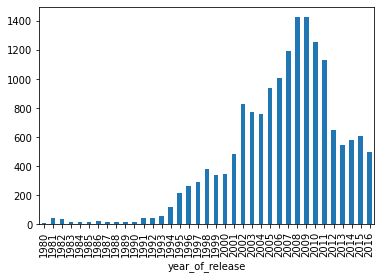

In [ ]:
#Построим график распредения колиества игр за разные годы
(
    data.groupby('year_of_release')['name'].count()
    .plot.bar(x='year_of_release')
)

Из графика видно, что количество игр расло с 1980 до 2011, а потом был резкий спуск. В 2013-2015 годы количество игр также немного росло, но не превысило уровень 2012 года. В 2016 году снова был небольшой спад. Таким образом, наиболле важными данные будут после спада, т.е. начиная с 2012.

#### Продажи по платформам

In [ ]:
#находим платформы с наибольшими суммарными продажами
platforms = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head()
platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: all_sales, dtype: float64

Из общих суммарных продаж по каждой платформе лидируют PS2, X360, PS3, Wii, DS. 

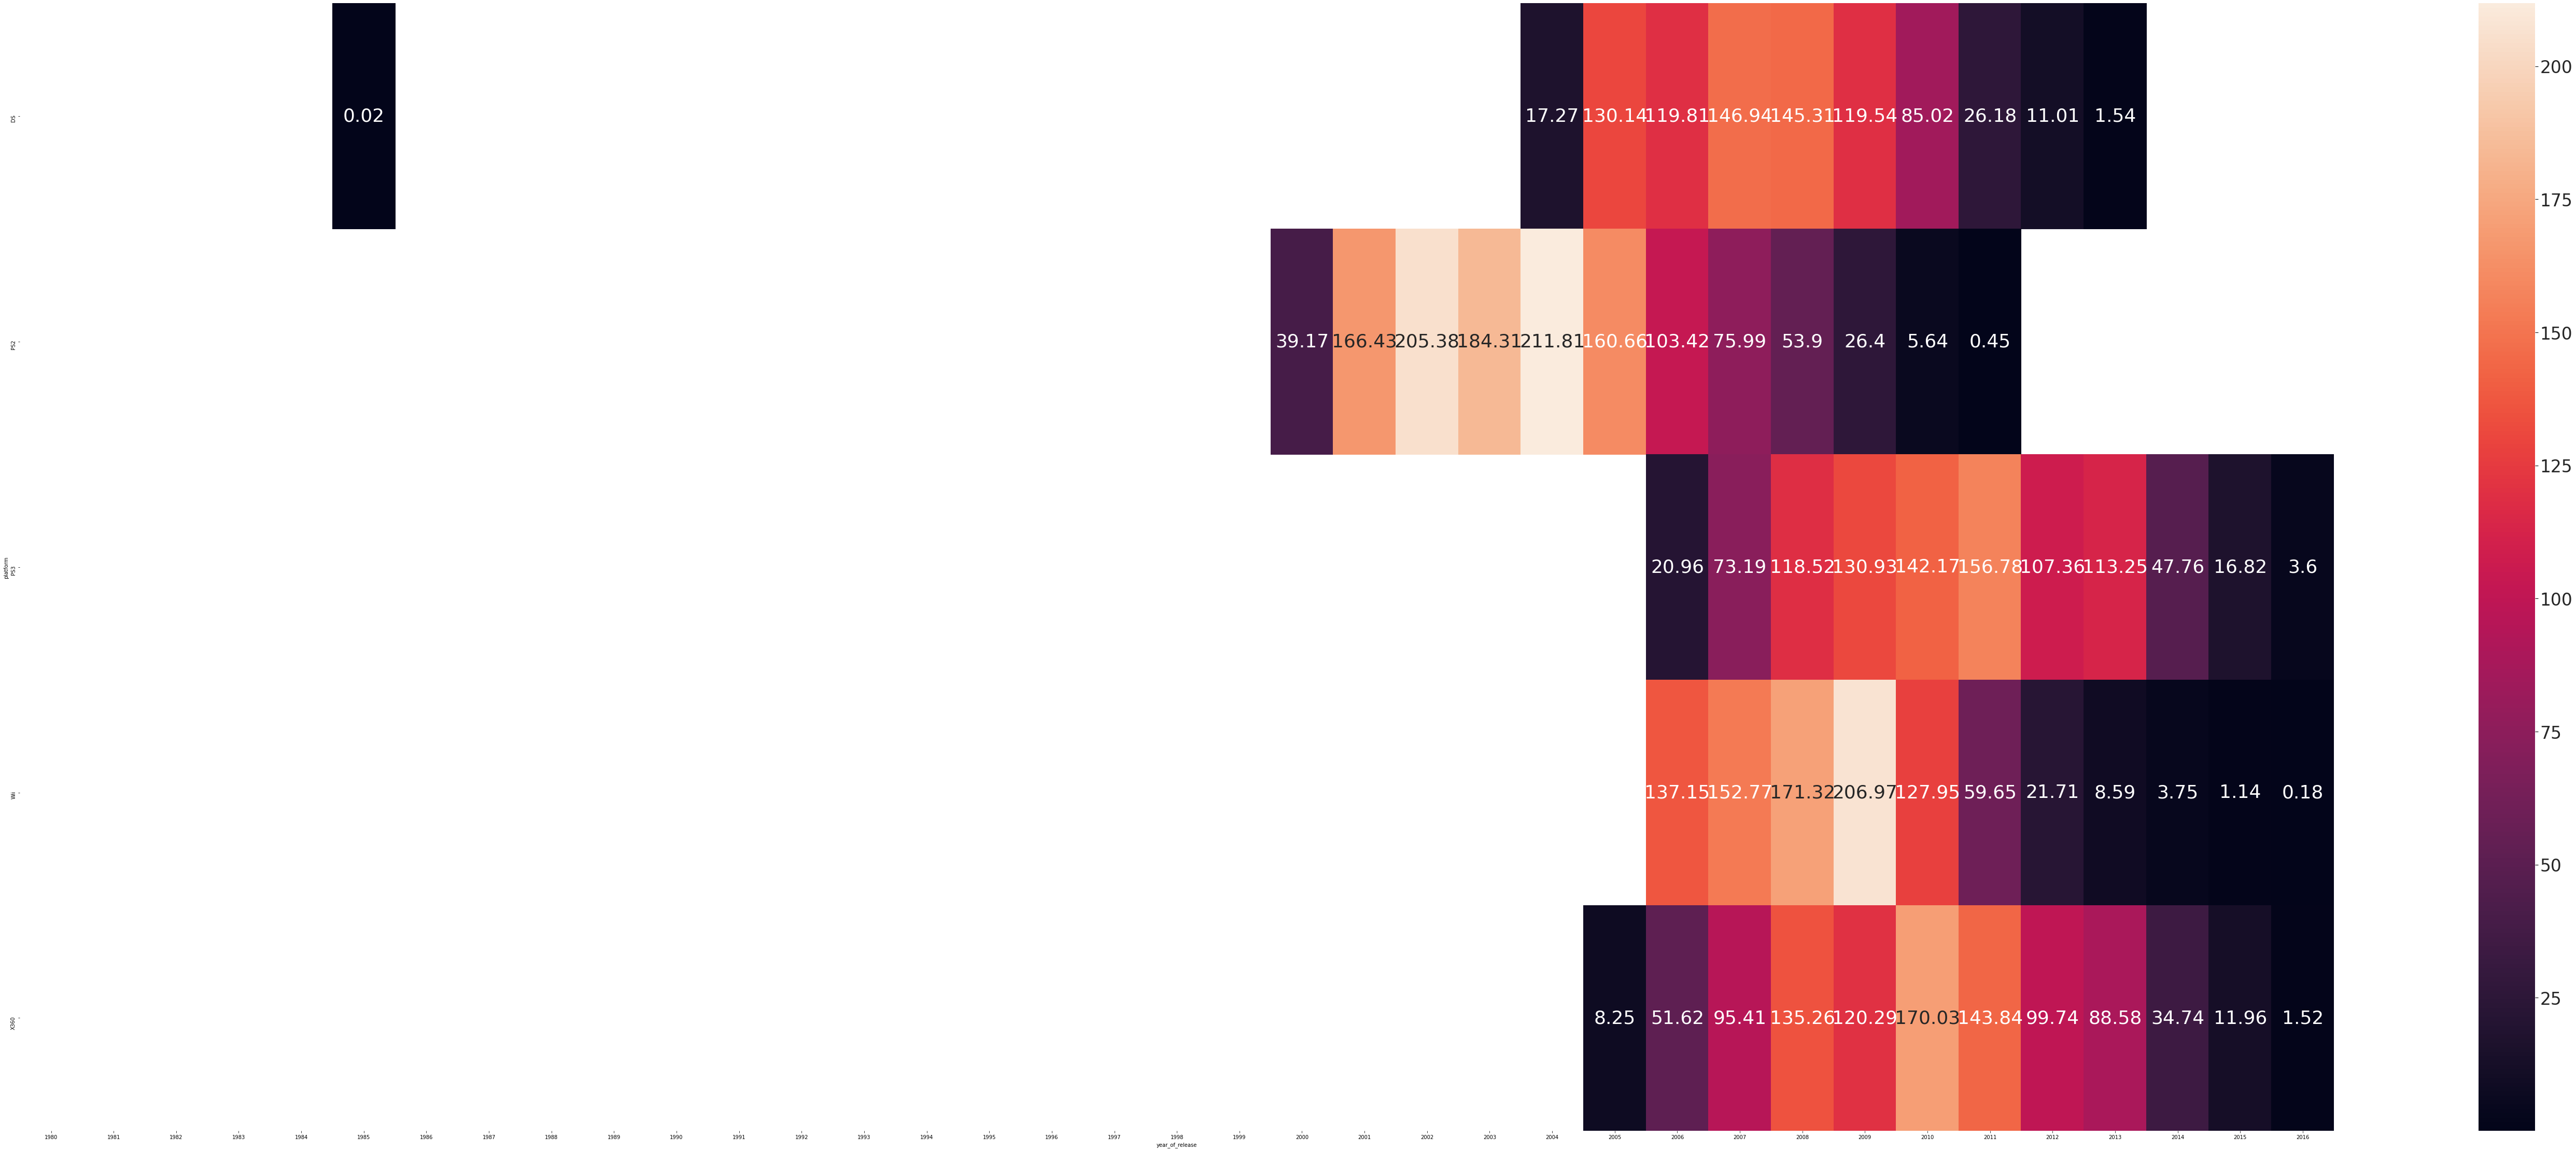

In [ ]:
#находим распределение продаж по годам на 5 платформах с самыми большими суммарными продажами
platforms = data.pivot_table(index='platform',columns='year_of_release', values='all_sales', aggfunc='sum')
platforms = platforms.query('platform == ["PS2","X360","PS3","Wii","DS"]')
plt.subplots(figsize = (100,40))
sns.set (font_scale= 3)
sns.heatmap(platforms, annot = True,fmt="g");

Текущий график частично подтверждает предыдущий. После 2012 года у лидирующих платформ тоже падают продажи. 

Новые платформы появляются в течение 4-6 лет от возникновения новой. Тем не менее платформы исчезают за 10-12 лет из-за технического прогресса. Из графиков видно, что платформы DS и PS2 последние года не выпускают игры.

#### Актуальный период

Наиболее важными и актуальными являются данные после спада, т.е. о тех играх, что выпущены в или после 2012.

In [ ]:
current_data = data[data['year_of_release'] >= 2012]
current_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,unknown,unknown,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,unknown,unknown,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


#### Платформы - лидиры продаж

Построим график продаж с распределением по годам для каждой платформы из актуальных данных.

<AxesSubplot:xlabel='Год выпуска', ylabel='Суммарный объем продаж'>

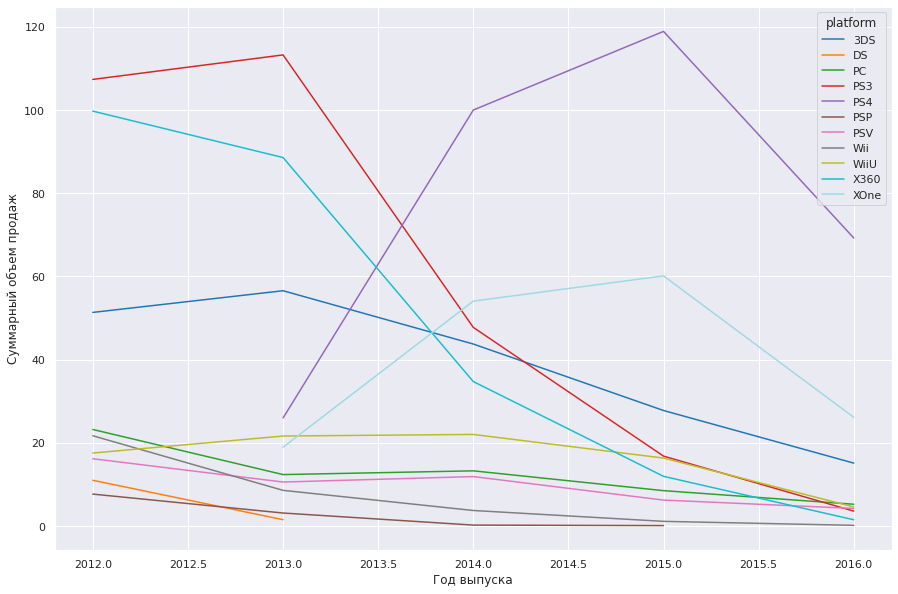

In [ ]:
sns.set (font_scale= 1)
(
    current_data
    .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc='sum')
    .plot(
        grid=True,
        figsize = (15,10),
        xlabel = 'Год выпуска',
        ylabel = 'Суммарный объем продаж',
        cmap = 'tab20'
    )
)

Из графика видно, что потенциально прибыльными платформами являются PS4, XOne, 3DS.

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

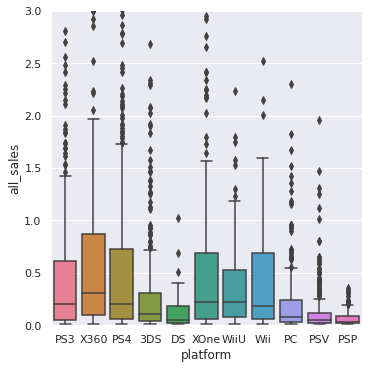

In [ ]:
sns.catplot(x='platform', y="all_sales", kind="box", data=current_data, palette='husl').set(ylim=(0, 3))

Из графиков видно, что наибольшее медианное значение общих продаж у X360, наименьшее - PSP. Среди выбранных ранее платформ PS4, XOne, 3DS у XOne наибольшая медиана продаж, а у 3DS - наименьшее. 

#### Корреляция продаж внутри платформ и отзывов пользователей и критиков

/tmp/ipykernel_31/3548641087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_data['user_score'] = platform_data['user_score'].astype('float')
/tmp/ipykernel_31/3548641087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_data['critic_score'] = platform_data['critic_score'].astype('int')


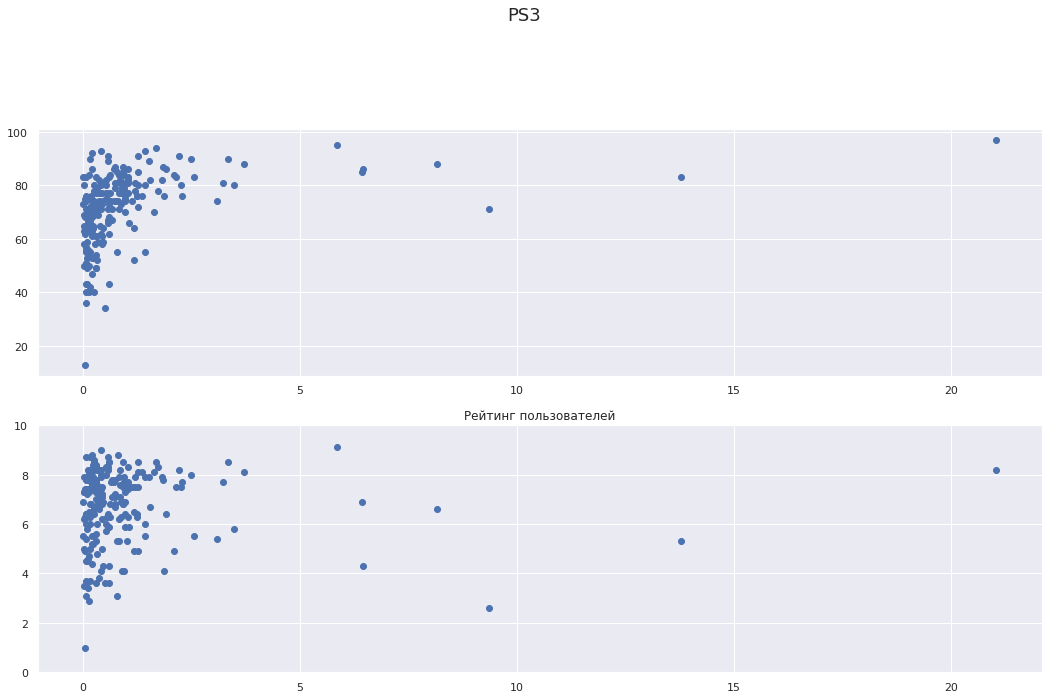

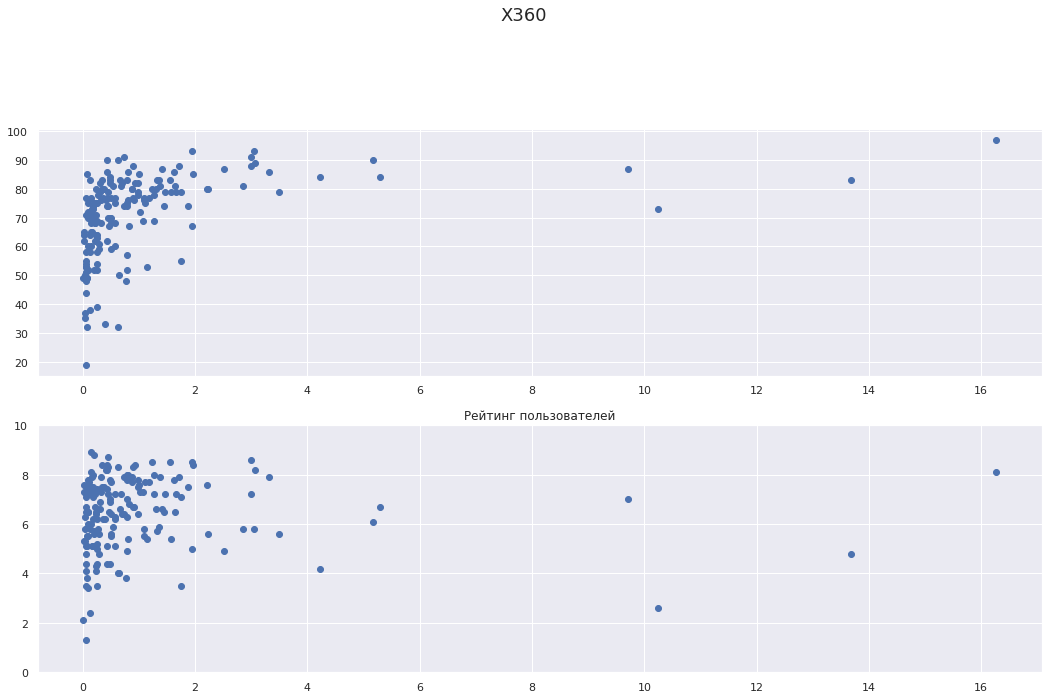

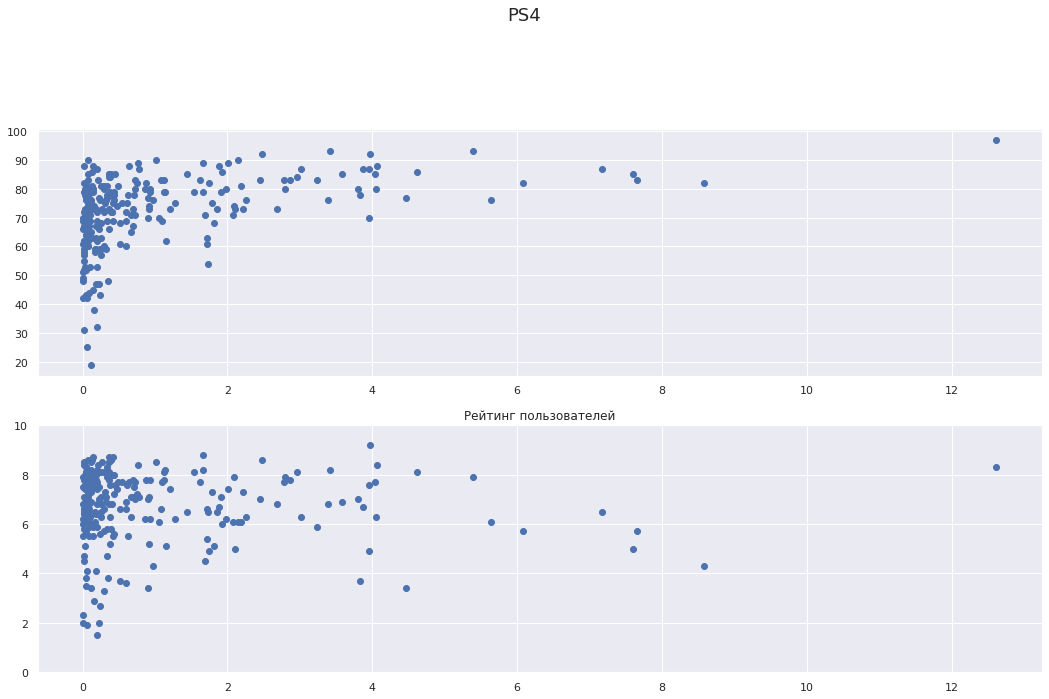

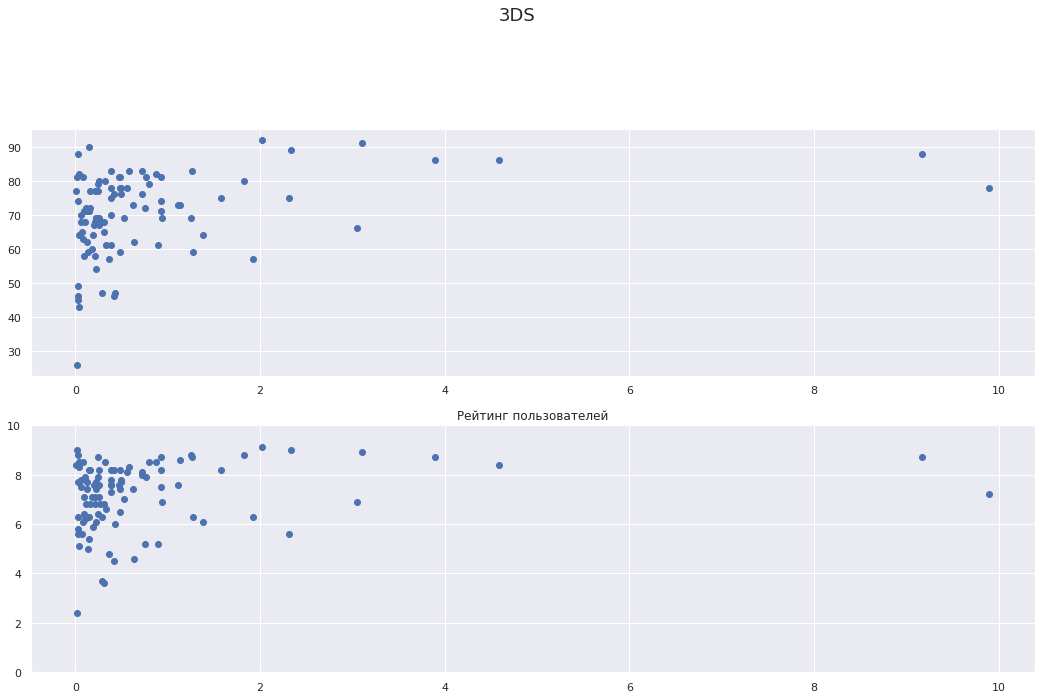

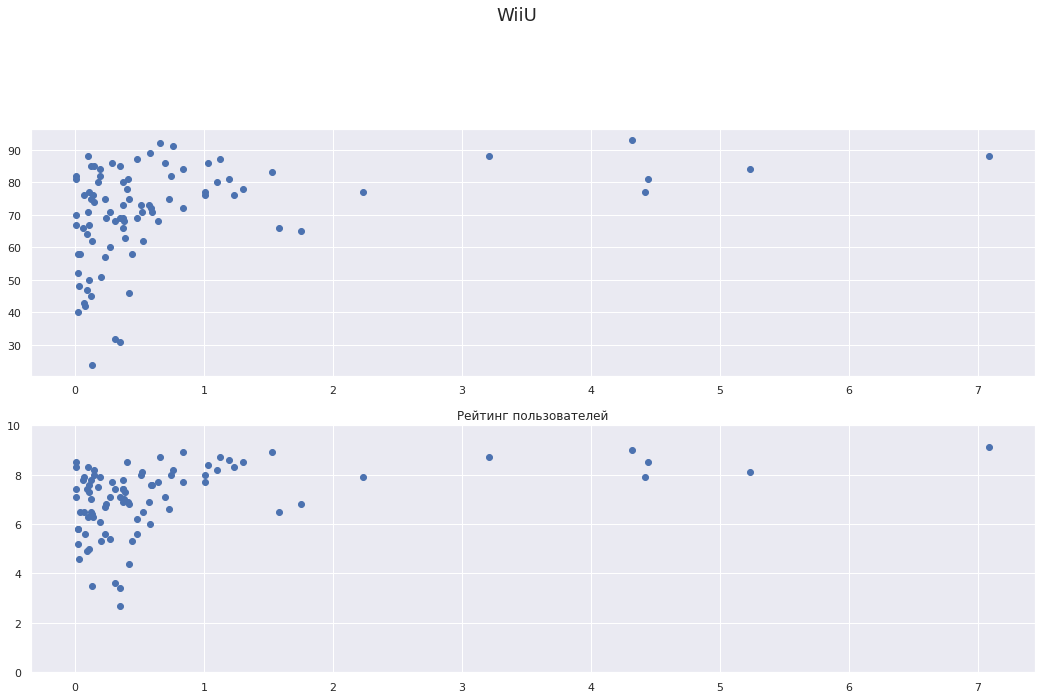

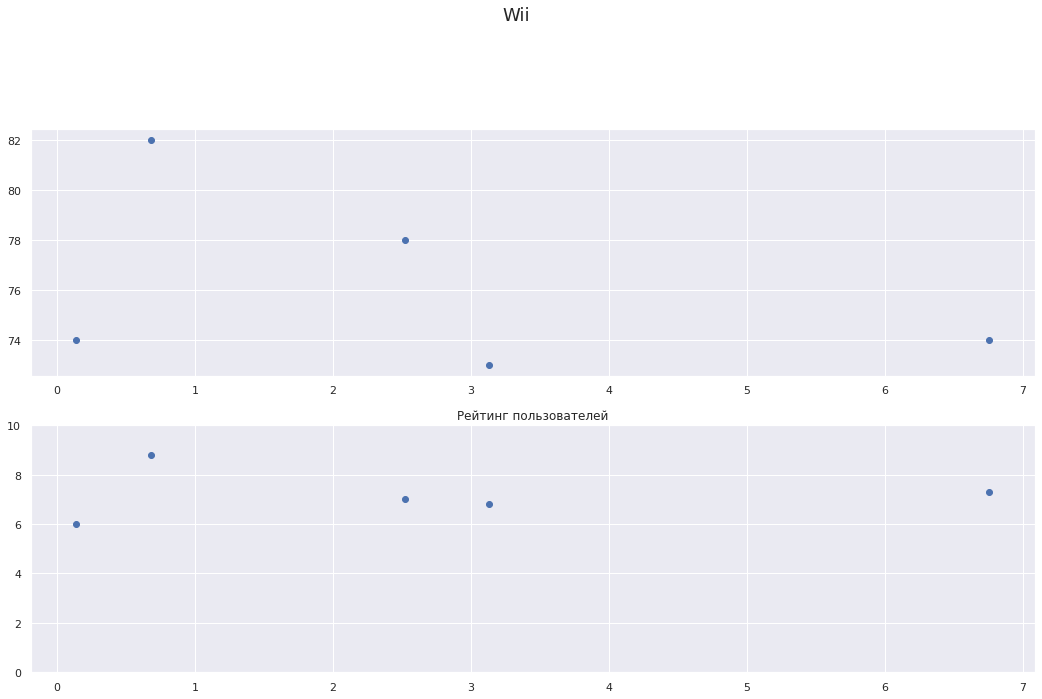

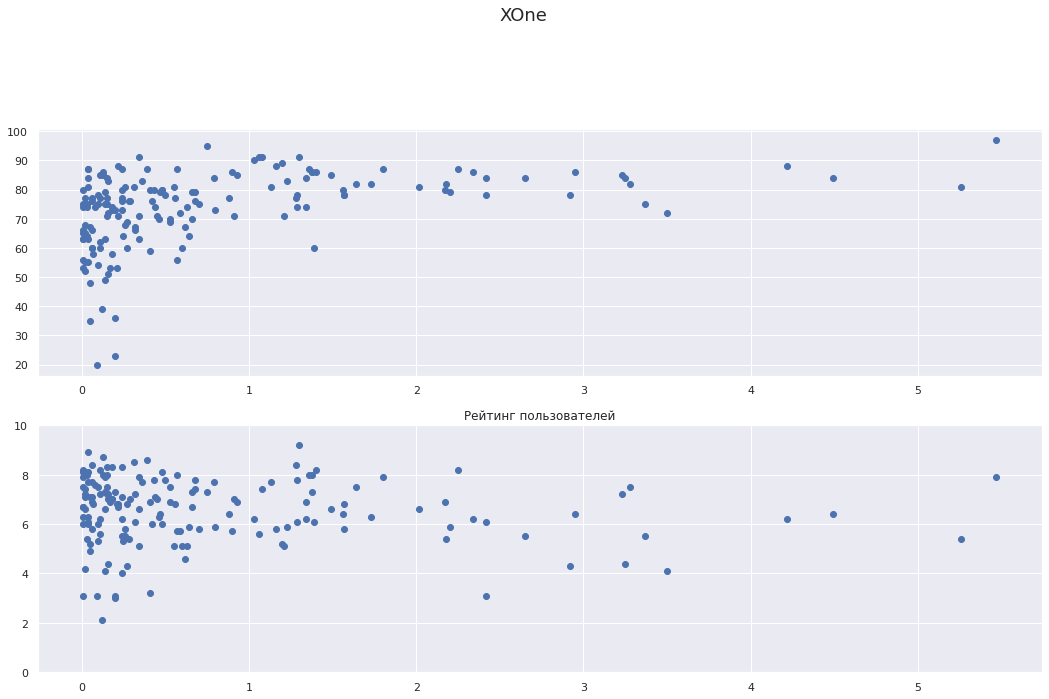

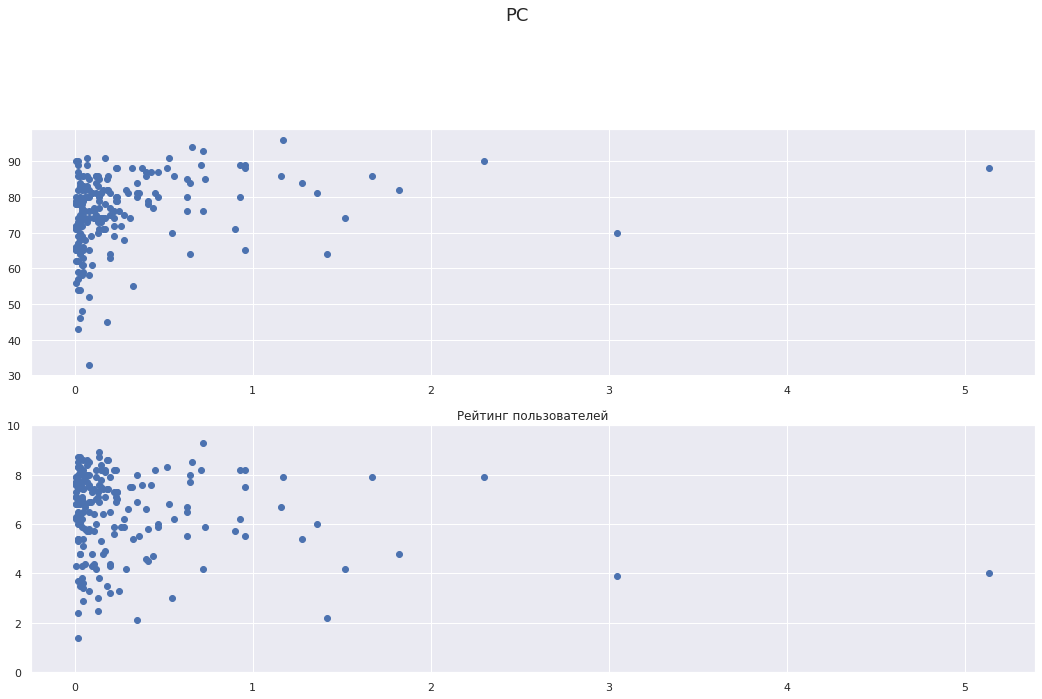

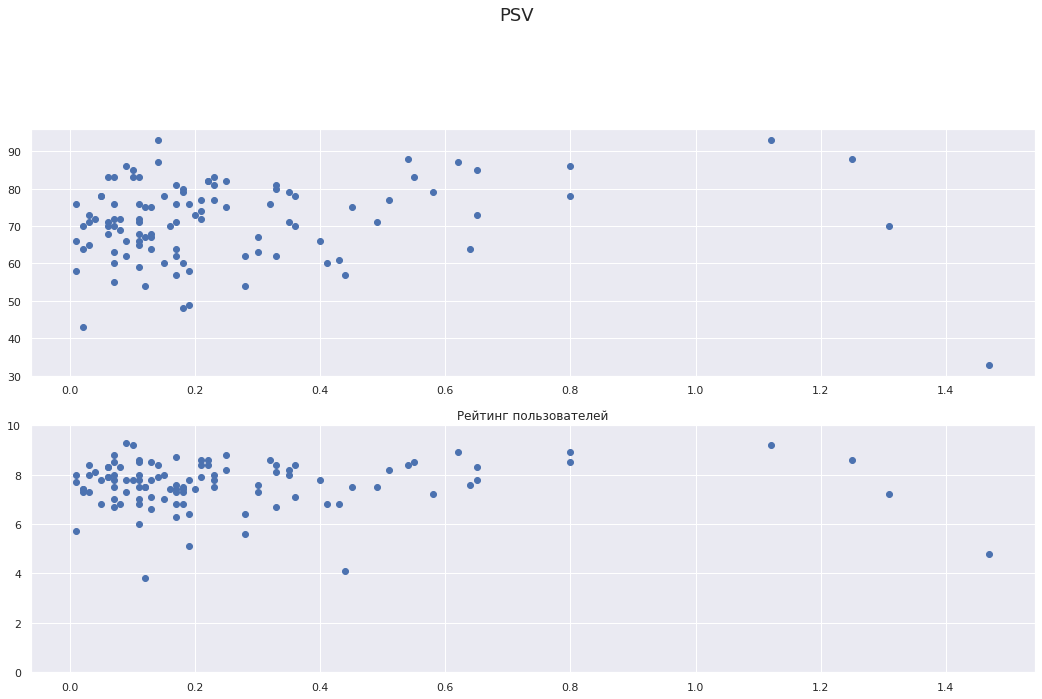

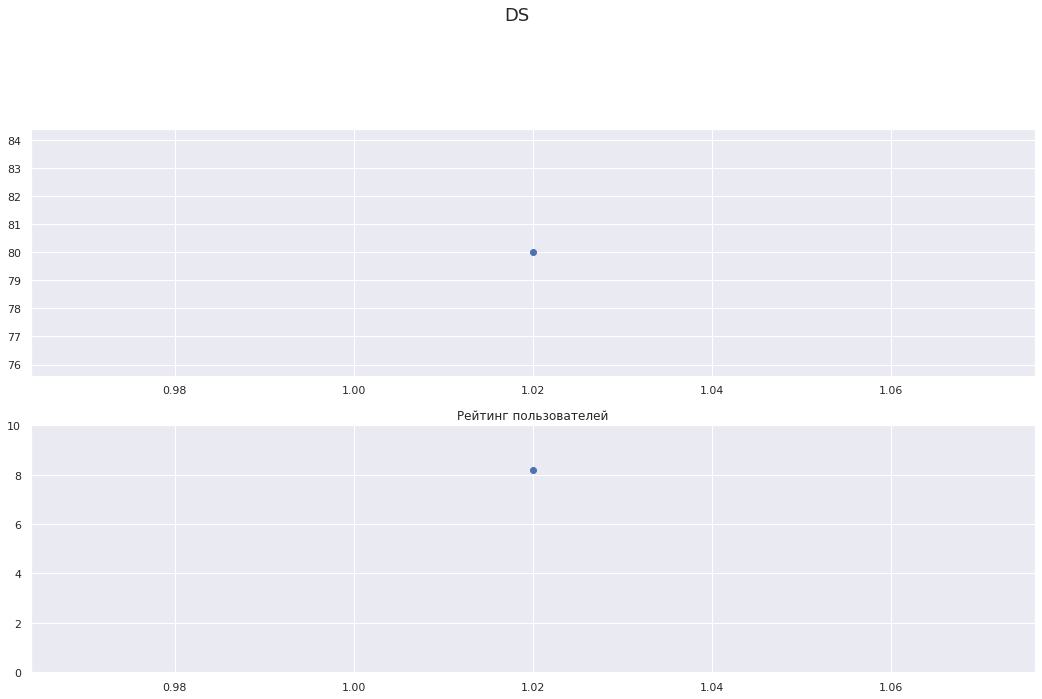

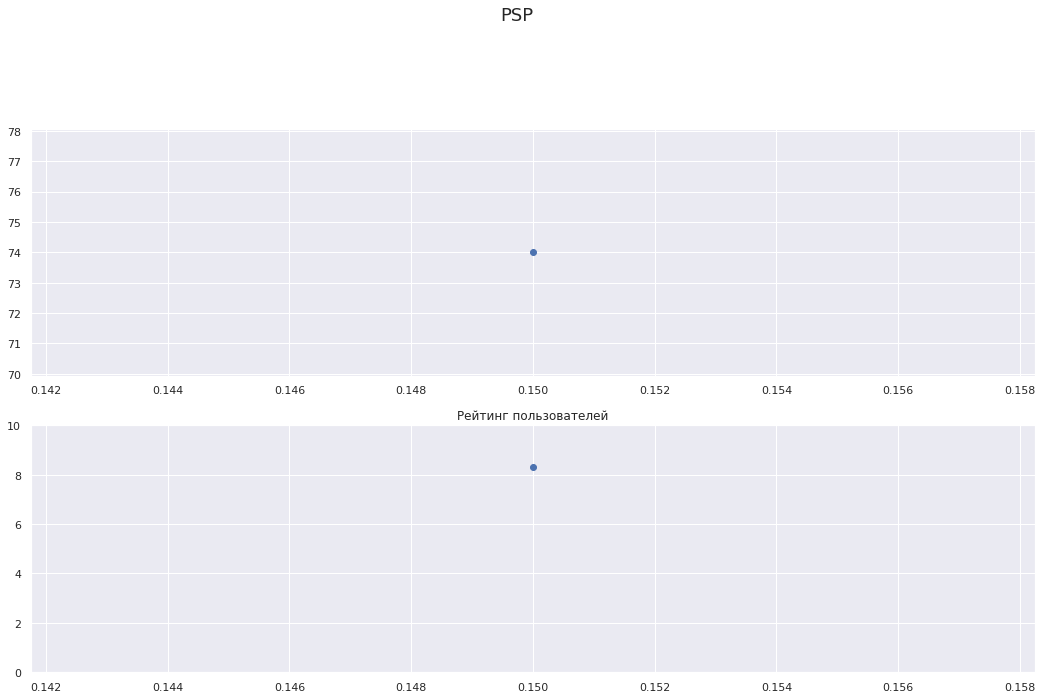

In [ ]:
#выберем данные для построения графиков, убрав неизвестные значения
platform_data = current_data.loc[(current_data['critic_score'] != 'unknown')
                                &(current_data['user_score'] != 'unknown')]
platform_data['user_score'] = platform_data['user_score'].astype('float')
platform_data['critic_score'] = platform_data['critic_score'].astype('int')

#для каждой платформы построим график корреляции между оценками критиков и пользователей и продажами
for platform in platform_data['platform'].unique():
    fig_scatter, (scatter_1, scatter_2) = plt.subplots(2, 1, figsize=(18,10))
    plt.suptitle(platform, y=1.05, fontsize=18)
    scatter_1.scatter(y='critic_score', x='all_sales', data = platform_data[platform_data['platform'] == platform])
    plt.title('Рейтинг критиков',  fontsize=12)
    scatter_2.scatter(y='user_score', x='all_sales', data = platform_data[platform_data['platform'] == platform])
    scatter_2.set(ylim=[0,10])
    plt.title('Рейтинг пользователей',  fontsize=12)
    

In [ ]:
#построим также таблицы корреляций для более точного численного обозначения
for platform in platform_data['platform'].unique():
    print(platform)
    print('critic score', np.corrcoef(platform_data.loc[platform_data['platform'] == platform, 'critic_score'], platform_data.loc[platform_data['platform'] == platform, 'all_sales']))
    print('user score', np.corrcoef(platform_data.loc[platform_data['platform'] == platform, 'user_score'], platform_data.loc[platform_data['platform'] == platform, 'all_sales']))

PS3
critic score [[1.         0.33105662]
 [0.33105662 1.        ]]
user score [[1.         0.00322741]
 [0.00322741 1.        ]]
X360
critic score [[1.         0.36057349]
 [0.36057349 1.        ]]
user score [[ 1.         -0.00201404]
 [-0.00201404  1.        ]]
PS4
critic score [[1.        0.4058948]
 [0.4058948 1.       ]]
user score [[ 1.         -0.03362498]
 [-0.03362498  1.        ]]
3DS
critic score [[1.         0.31055302]
 [0.31055302 1.        ]]
user score [[1.         0.20181255]
 [0.20181255 1.        ]]
WiiU
critic score [[1.         0.35088242]
 [0.35088242 1.        ]]
user score [[1.         0.39184795]
 [0.39184795 1.        ]]
Wii
critic score [[ 1.        -0.4243413]
 [-0.4243413  1.       ]]
user score [[1.         0.00975553]
 [0.00975553 1.        ]]
XOne
critic score [[1.         0.41042204]
 [0.41042204 1.        ]]
user score [[ 1.         -0.09400318]
 [-0.09400318  1.        ]]
PC
critic score [[1.         0.23600774]
 [0.23600774 1.        ]]
user score [

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Были рассмотрены все платформы в актуальных данных: PS3, X360, PS4, 3DS, WiiU, Wii, XOne, PC, PSV, DS, PSP. По платформам PSP, DS, Wii данных недостаточно, чтобы говорить о взаимосвязи продаж и оценок.
* PS3 - наблюдается слабая корреляция между продажами и оценками пользователей; зависимость от мнения критиков больше.
* X360 - существует определенная корреляция между оценками критиков и продажами, тогда как между мнением пользователей и продами прослеживается слабая отрицательная корреляция.
* PS4 - ситуация такая же как и на X360.
* 3DS - наблюдается небольшая положительная корреляция продаж и обоих оценок.
* WiiU - ситуация такая же как на 3DS.
* XOne - ситуация такая же как и на X360.
* PC - ситуация такая же как и на X360, хотя корреляция между оценками критиков чуть меньше.
* PSV - есть слабые положительные корреляции между обоими оценками.

Итак, чаще всего прослеживается определенная зависимость от оценок критиков, тогда как взаимосвязи от оценок пользователей слабее.

#### Распределение игр по жанрам

In [ ]:
current_data.groupby('genre')['all_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.296723
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.442917
Simulation      0.439000
Action          0.427856
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: all_sales, dtype: float64

Наибольшие продажи наблюдаются в жанре Shooter, наименьшее - Adventure.

**Вывод:** наиболее актуальными являются данные от 2012 года. Наиболее перспективными платформами являются PS4, XOne, 3DS. Кроме очевидно больших продаж на этих платформах, они также совместимы для игр со своих предыдущих платформ, которые также являлись лидерами по продажам - PS3 и PS2, X360, DS.

### Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

<AxesSubplot:title={'center':'North America Market'}, ylabel='na_sales'>

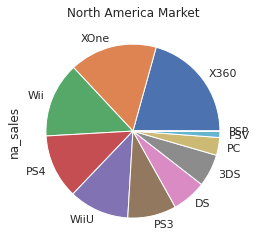

In [ ]:
#найдем платформы для Северной Америки
(
    current_data.pivot_table(index='platform', values='na_sales', aggfunc='mean')
    .sort_values(by='na_sales', ascending=False)
    .plot(kind='pie',y='na_sales', legend=False, title='North America Market')
)

Топ-5 популярных платформ в Северной Америке: X360, XOne, Wii, PS4, WiiU.

<AxesSubplot:title={'center':'Europe Market'}>

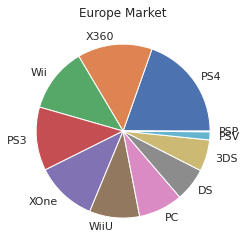

In [ ]:
#найдем платформы для Европы
(
    current_data.pivot_table(index='platform', values='eu_sales', aggfunc='mean')
    .sort_values(by='eu_sales', ascending=False)
    .plot(kind='pie',y='eu_sales',ylabel='', legend=False, title='Europe Market')
)

Топ-5 популярных платформ в Европе: PS4, X360, Wii, PS3, XOne.

<AxesSubplot:title={'center':'Japanese Market'}>

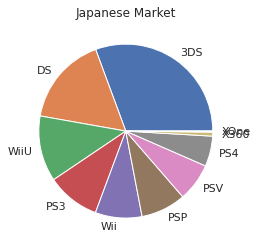

In [ ]:
#найдем платформы для Японии
(
    current_data.pivot_table(index='platform', values='jp_sales', aggfunc='mean')
    .sort_values(by='jp_sales', ascending=False)
    .plot(kind='pie',y='jp_sales',ylabel='', legend=False, title='Japanese Market', normalize=True)
)

Топ-5 популярных платформ в Японии: 3DS, DS, Wiiu, PS3, Wii.

#### Самые популярные жанры (топ-5)

<AxesSubplot:title={'center':'North America Market'}>

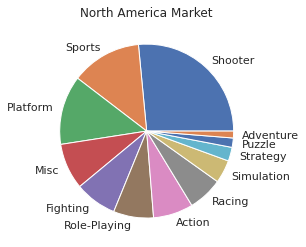

In [ ]:
#найдем жанры для Северной Америки
(
    current_data.pivot_table(index='genre', values='na_sales', aggfunc='mean')
    .sort_values(by='na_sales', ascending=False)
    .plot(kind='pie',y='na_sales',ylabel='', legend=False, title='North America Market')
)

Топ-5 популярных жанров в Северной Америке: Shooter, Sports, Platform, Misc, Fighting.

<AxesSubplot:title={'center':'Europe Market'}>

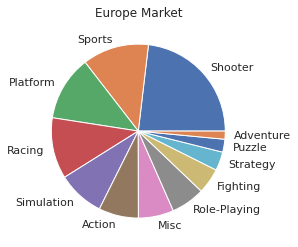

In [ ]:
#найдем жанры для Европы
(
    current_data.pivot_table(index='genre', values='eu_sales', aggfunc='mean')
    .sort_values(by='eu_sales', ascending=False)
    .plot(kind='pie',y='eu_sales',ylabel='', legend=False, title='Europe Market')
)

Топ-5 популярных жанров в Европе: Shooter, Sports, Platform, Racing, Simulation.

<AxesSubplot:title={'center':'Japanese Market'}>

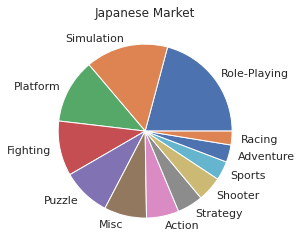

In [ ]:
#найдем жанры для Японии
(
    current_data.pivot_table(index='genre', values='jp_sales', aggfunc='mean')
    .sort_values(by='jp_sales', ascending=False)
    .plot(kind='pie',y='jp_sales',ylabel='', legend=False, title='Japanese Market', normalize=True)
)

Топ-5 популярных жанров в Японии: Role-Playing, Simulation, Platform, Fighting, Puzzle.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

<AxesSubplot:xlabel='rating'>

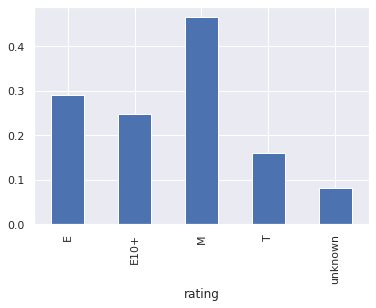

In [ ]:
#найдем распределение продаж по рейтингам для Северной Америки
(
    current_data.pivot_table(index='rating', values='na_sales', aggfunc='mean')
    .plot.bar(y='na_sales',grid=True,legend=False)
)

Лучше всего в Америке продаютс игры с рейтингом М, хуже - Т

<AxesSubplot:xlabel='rating'>

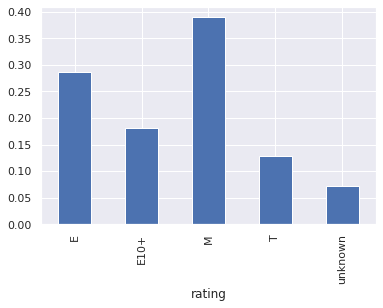

In [ ]:
#найдем распределение продаж по рейтингам для Европы
(
    current_data.pivot_table(index='rating', values='eu_sales', aggfunc='mean')
    .plot.bar(y='eu_sales',grid=True,legend=False)
)

Лучше всего в Европе продаютс игры с рейтингом М, хуже - Т

<AxesSubplot:xlabel='rating'>

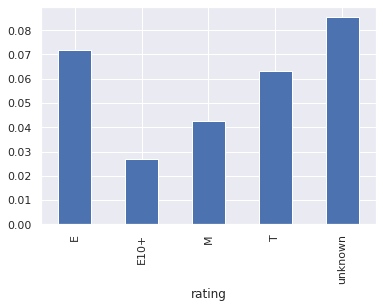

In [ ]:
#найдем распределение продаж по рейтингам для Японии
(
    current_data.pivot_table(index='rating', values='jp_sales', aggfunc='mean')
    .plot.bar(y='jp_sales',grid=True,legend=False)
)

Лучше всего в Японии продаются игры с рейтингом Е, хуже - Е10+, но предоставленные данные крайне недостоверные, т.к. много неизвестных рейтингов.

**Вывод:** 
* Портрет пользователя в Северной Америке: человек, пользующийся приставками Xbox(360 или One), предпочитающий играть в Shooter с рейтингом М.
* Портрет пользователя в Европе: человек, пользующийся приставками Xbox(360 или One) или PlayStation (3,4), предпочитающий играть в Shooter с рейтингом М.
* Портрет пользователя в Японии: человек, пользующийся приставками семейства Nintendo (DS,3DS,Wii, Wii U), предпочитающий играть в Role-Playing.

Доля значений, заполненных заглушкой в продажах в Северной Америке и Европе намного меньше, чем в Японии. Поэтому можно сказать, что присутствие ESRB в Северо-Американском и Европейском регионе влияет на продажи,а в Японском - нет. 

###  Гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Т.к. нам необходимо выяснить равны ли два числа, то нулевая теория будет сформулирована со знаком "=". Т.к. нам неинтересно в какую сторону смещение, то альтернативная теория двусторонняя.

H_0: Польовательские рейтинги (user_score) пользователей "XOne" = Польовательские рейтинги (user_score) пользователей "PC"

H_a: Польовательские рейтинги (user_score) пользователей "XOne" ≠ Польовательские рейтинги (user_score) пользователей "PC"

Уровень значимость возьмем стандартный.
alpha = 0.05

In [ ]:
#выделяем выборки
data_xbox = data.loc[(data['platform'] == 'XOne')&(data['user_score'] != "unknown")]
data_pc = data.loc[(data['platform'] == 'PC')&(data['user_score'] != 'unknown')]
data_xbox['user_score'] = data_xbox['user_score'].astype('float64')
data_pc['user_score'] = data_pc['user_score'].astype('float64')

alpha = .05
results = st.ttest_ind(data_xbox.dropna()['user_score'],data_pc.dropna()['user_score'])
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.3037979620149106e-05
Отвергаем нулевую гипотезу


**Вывод:** нулевую теорию, которая гласила о равенстве двух показателей, мы отвергаем. Значит, наша изначальная гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не верна.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные; 

Т.к. нам необходимо выяснить разные ли два числа, то нулевая теория будет сформулирована со знаком "=". Если мы ее отбросим в результате проверки, то наша первая гипотеза подтвердится, иначе - нет. Т.к. нам неинтересно в какую сторону смещение, то альтернативная теория двусторонняя.

H_0: Польовательские рейтинги (user_score) жанров "Action" = Польовательские рейтинги (user_score) жанров "Sports"

H_a: Польовательские рейтинги (user_score) жанров "Action" ≠ Польовательские рейтинги (user_score) жанров "Sports"

Уровень значимость возьмем стандартный. alpha = 0.05

In [ ]:
data_action = data.loc[(data['genre'] == 'Action')&(data['user_score'] != "unknown")&(data['user_score'] != 0)]
data_sport = data.loc[(data['genre'] == 'Sports')&(data['user_score'] != 'unknown')&(data['user_score'] != 0)]
data_action['user_score'] = data_action['user_score'].astype('float64')
data_sport['user_score'] = data_sport['user_score'].astype('float64')

alpha = .05

results = st.ttest_ind(data_action.dropna()['user_score'],data_sport.dropna()['user_score'])
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


/tmp/ipykernel_48/2841672806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_action['user_score'] = data_action['user_score'].astype('float64')
/tmp/ipykernel_48/2841672806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sport['user_score'] = data_sport['user_score'].astype('float64')


**Вывод:** нулевую теорию, которая гласила о равенстве двух показателей, мы не отвергаем. Значит, наша изначальная гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" не верна.

###  Общий вывод

В данном проекте рассматривались исторические данные о продажи компьютерных игр. Было выявить определяющие успешность игры закономерности, что в дальнейшнм будет использоваться для планирования рекламных кампаний на 2017 год. 

**1. Предобрабтка данных**
Файл содержит данные по 16715 продажам игр за разные годы, каждый из которых описывается 11 признаками (6 количественных и 5 категориальных). У некоторых признаков есть пропущенные значения, которые было необходимо обработать, а также решить, что делать с необычными значенимиясм. Есть несколько столбцов с неверным типом данных, исходя из предметной области.

Пропуски были обнаружены в столбца с наименованием, годом выпуска, оценками и рейтингом. Пропуски в столбцах наименование и год выпуска могли возникнуть в ходе технического сбоя. В столбцах же оценками и рейтингом, помимо сбоя могло иметь место отсутсвие информации, например, т.к. только вышла.
Т.к. значения в столбцах наименование и год выпуска неполучилось бы заполнится максимально корректно, исходя из предоставленных данных, строки с пропущенными значениями в этих столбцах было решено убрать.
В списке значений столбца с оценками пользователй присутствует аббревиатура tbd. В области компьютерных игр это обычно обозначает To Be Discussed, т.е. оценка еще не определена. Т.к. данный столбец категориальный, неизвестные значения и tbd были заполнены  заглушкой 'unknown'. Столбец с оценками критиков тоже категориальный, его неизвестные значения были заполнены  заглушкой 'unknown'. То же относится к столбцу с рейтингом.

Столбец с годом был приведен  к целочисленным значениям, потому что у нас целый год, он один в полномасштабной дате смысла нет.
Столбцы с оценками были приведены к числам там, где это возможно.

Был добавлен стодбец с суммарными продажами.

**2. Исследовательский анализ данных**
Было обноружено, что количество игр расло с 1980 до 2011, а потом был резкий спуск. В 2013-2015 годы количество игр также немного росло, но не превысило уровень 2012 года. В 2016 году снова был небольшой спад. Таким образом, наиболее важными данные будут после спада, т.е. начиная с 2012.

Из общих суммарных продаж по каждой платформе лидируют PS2, X360, PS3, Wii, DS, но после 2012 года у лидирующих платформ тоже падают продажи. Было установлено, что новые платформы появляются в течение 4-6 лет от возникновения новой. Тем не менее платформы исчезают за 10-12 лет из-за технического прогресса. Платформы DS и PS2 последние года не выпускают игры.

Потенциально прибыльными платформами являются PS4, XOne, 3DS за актуальный период. Если рассматривать продажи за все время, указанном в данных, наибольшее медианное значение общих продаж у X360, наименьшее - PSP. Среди выбранных ранее платформ PS4, XOne, 3DS у XOne наибольшая медиана продаж, а у 3DS - наименьшее.

Были рассмотрены все платформы в актуальных данных: PS3, X360, PS4, 3DS, WiiU, Wii, XOne, PC, PSV, DS, PSP на предмет взаимосвязи оценок от пользователей и критиков на продажи внутри платформы. По платформам PSP, DS, Wii данных недостаточно, чтобы говорить о взаимосвязи продаж и оценок.

* PS3 - наблюдается слабая корреляция (0.003) между продажами и оценками пользователей; зависимость от мнения критиков больше (0.33).
* X360 - существует определенная корреляция между оценками критиков и продажами (0.36, тогда как между мнением пользователей и продами прослеживается слабая отрицательная корреляция (-0.002).
* PS4 - ситуация такая же как и на X360 (0.4 и -0.03 соответственно).
* 3DS - наблюдается небольшая положительная корреляция продаж и обоих оценок (0.31 - от оценок критиков и 0.2 у пользователей).
* WiiU - ситуация такая же как на 3DS (0.35 и 0.39 соответственно).
* XOne - ситуация такая же как и на X360 (0.41 и -0.09 соответственно).
* PC - ситуация такая же как и на X360, хотя корреляция между оценками критиков чуть меньше (0.2 и -0.1 соответственно).
* PSV - есть слабые положительные корреляции между обоими оценками (0.09 - от оценок критиков и 0.01 у пользователей).

Итак, чаще всего прослеживается определенная зависимость от оценок критиков, тогда как взаимосвязи от оценок пользователей слабее.

Было установлено, что наибольшие продажи наблюдаются в жанре Shooter, наименьшее - Adventure.


Таким образом, наиболее актуальными для планирования являются данные от 2012 года. Наиболее перспективными платформами являются PS4, XOne, 3DS. Кроме очевидно больших продаж на этих платформах, они также совместимы для игр со своих предыдущих платформ, которые также являлись лидерами по продажам - PS3 и PS2, X360, DS.

**3. Составление портрета пользователя каждого региона**

Для каждого из представленных регионов было проведено исследование самых популярных платформ, жанров и рейтингов. 
*Топ-5 популярных платформ в Северной Америке:* 

1) X360,

2) XOne, 

3) Wii,

4) PS4,

5) WiiU.

*Топ-5 популярных платформ в Европе: *
1) PS4,

2) X360, 

3) Wii,

4) PS3,

5) XOne.

*Топ-5 популярных платформ в Японии:* 
1) 3DS, 

2) DS, 

3) Wiiu,

4) PS3, 

5) Wii.

*Топ-5 популярных жанров в Северной Америке: *
1) Shooter, 

2) Sports,

3) Platform, 

4) Misc, 

5) Fighting.

*Топ-5 популярных жанров в Европе: *
1) Shooter, 

2) Sports, 

3) Platform, 

4) Racing, 

5) Simulation.

*Топ-5 популярных жанров в Японии:* 
1) Role-Playing, 

2) Simulation, 

3) Platform, 

4) Fighting, 

5) Puzzle.

Лучше всего в Америке продаютс игры с рейтингом М, хуже - Т
Лучше всего в Европе продаютс игры с рейтингом М, хуже - Т
Лучше всего в Японии продаютс игры с рейтингом Е, хуже - Е10+, но предоставленные данные крайне недостоверные, т.к. много неизвестных рейтингов.
Кроме того определили, что присутствие ESRB в Северо-Американском и Европейском регионе влияет на продажи,а в Японском - нет.

*Портрет пользователя в Северной Америке:* человек, пользующийся приставками Xbox(360 или One), предпочитающий играть в Shooter с рейтингом М.

*Портрет пользователя в Европе:* человек, пользующийся приставками Xbox(360 или One) или PlayStation (3,4), предпочитающий играть в Shooter с рейтингом М.

*Портрет пользователя в Японии:* человек, пользующийся приставками семейства Nintendo (DS,3DS,Wii, Wii U), предпочитающий играть в Role-Playing с рейтингом E.

**4. Проверка гипотез**
В результате проверок было определно, что
1) Мы отвергли нудевую теорию, которая говорила о равенстве. Значит, наша изначальная гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не верна.

2) Мы отвергли нудевую теорию, которая говорила о неравенстве. Значит, наша изначальная гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" не верна.

Таким образом, наиболее успешные игры выпускаются под платформы PS4, XOne, 3DS в жанрах Shooter, Sports, и Platform, с рейтингами М.